Saving runway.png to runway.png
Loaded: runway.png
Image loaded.


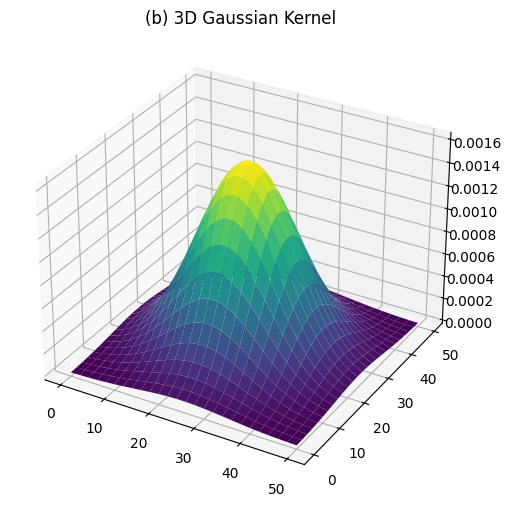

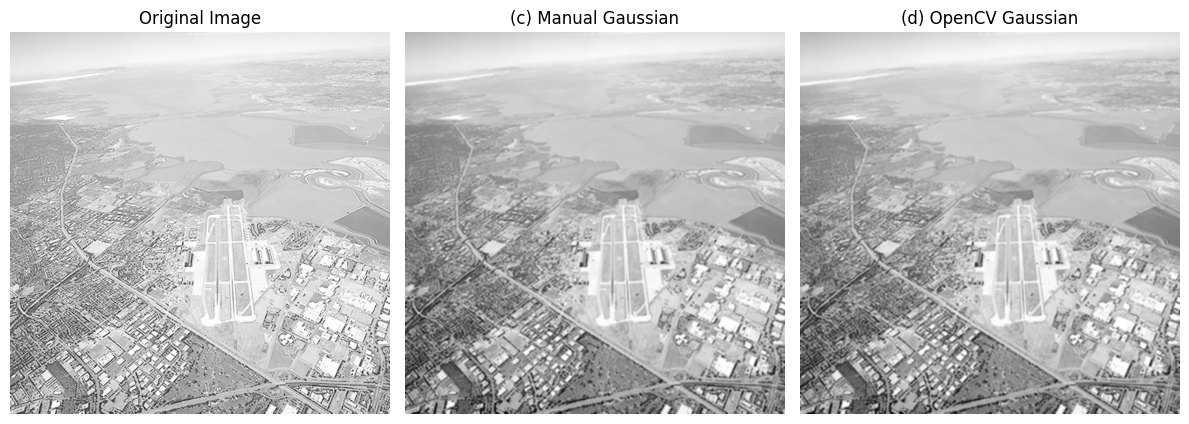

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
path = list(uploaded.keys())[0]
print("Loaded:", path)

# Make Gaussian kernel manually
def get_gaussian_kernel(size, sigma):
    center = size // 2
    kernel = np.zeros((size, size))
    for x in range(size):
        for y in range(size):
            d = (x - center)**2 + (y - center)**2
            kernel[x, y] = np.exp(-d / (2 * sigma**2))
    return kernel / kernel.sum()

# Load image
img = cv.imread(path, cv.IMREAD_GRAYSCALE)

if img is None:
    print("ERROR: Image not found.")
else:
    print("Image loaded.")

    #  3D Gaussian Kernel
    size_viz = 51
    sigma_viz = 10
    kernel_51 = get_gaussian_kernel(size_viz, sigma_viz)

    x = np.arange(0, size_viz, 1)
    y = np.arange(0, size_viz, 1)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, kernel_51, cmap='viridis')
    ax.set_title('(b) 3D Gaussian Kernel')
    plt.show()

    #  (c)/(d) Image Filtering
    sigma = 2
    kernel_5x5 = get_gaussian_kernel(5, sigma)

    img_manual = cv.filter2D(img, -1, kernel_5x5)
    img_builtin = cv.GaussianBlur(img, (5, 5), sigma)

    # Show results
    plt.figure(figsize=(12, 5))

    #  Original
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    #  Manual Result
    plt.subplot(1, 3, 2)
    plt.imshow(img_manual, cmap='gray')
    plt.title('(c) Manual Gaussian')
    plt.axis('off')

    #  Built-in Result
    plt.subplot(1, 3, 3)
    plt.imshow(img_builtin, cmap='gray')
    plt.title('(d) OpenCV Gaussian')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
